In [22]:
import pandas as pd

file_path = "E:/dasktop/Uchicago/DEP/final/NYCtem.csv"
data = pd.read_csv(file_path)

data.head()

,Unnamed: 0,Air Temperature (°F),Wind Speed (knots),Precipitation (inches),year,month,date,hour
0,0,69.0,0.0,0.0,2020,7,1,0
1,1,69.0,0.0,0.0,2020,7,1,1
2,2,68.0,0.0,0.0,2020,7,1,2
3,3,67.0,0.0,0.0,2020,7,1,3
4,4,68.0,0.0,0.0,2020,7,1,4


In [2]:
data = data[['valid', 'tmpf', 'sknt', 'p01i']]

data['valid'] = pd.to_datetime(data['valid'])

data.set_index('valid', inplace=True)
hourly_data = data.resample('H').mean()

hourly_data.reset_index(inplace=True)

In [14]:
data

,Unnamed: 0,valid,tmpf,sknt,p01i
0,0,2020-07-01 00:00:00,69.0,0.0,0.0
1,1,2020-07-01 01:00:00,69.0,0.0,0.0
2,2,2020-07-01 02:00:00,68.0,0.0,0.0
3,3,2020-07-01 03:00:00,67.0,0.0,0.0
4,4,2020-07-01 04:00:00,68.0,0.0,0.0
...,...,...,...,...,...
35059,35059,2024-06-30 19:00:00,73.0,3.0,0.0
35060,35060,2024-06-30 20:00:00,73.0,0.0,0.0
35061,35061,2024-06-30 21:00:00,73.0,5.0,0.0
35062,35062,2024-06-30 22:00:00,73.0,5.0,0.0


In [4]:
data_with_fixed_minutes = hourly_data.copy()
data_with_fixed_minutes['valid'] = data_with_fixed_minutes['valid'].dt.floor('H')  # Ensuring minutes are set to 00
daily_24_hours = data_with_fixed_minutes.groupby(data_with_fixed_minutes['valid']).mean().reset_index()


In [ ]:
def fill_nan_with_previous_average(column):
    return column.fillna(column.rolling(window=2, min_periods=1).mean())

daily_24_hours['tmpf'] = fill_nan_with_previous_average(daily_24_hours['tmpf'])
daily_24_hours['sknt'] = fill_nan_with_previous_average(daily_24_hours['sknt'])
daily_24_hours['p01i'] = fill_nan_with_previous_average(daily_24_hours['p01i'])


In [10]:
daily_24_hours['tmpf'] = fill_nan_with_previous_average(daily_24_hours['tmpf'])
daily_24_hours['sknt'] = fill_nan_with_previous_average(daily_24_hours['sknt'])
daily_24_hours['p01i'] = fill_nan_with_previous_average(daily_24_hours['p01i'])

# Checking again for any remaining NaN values
nan_summary_after = daily_24_hours.isnull().sum()


In [11]:
nan_summary_after

valid      0
tmpf       2
sknt     502
p01i       2
dtype: int64

In [15]:
daily_24_hours['year'] = daily_24_hours['valid'].dt.year
daily_24_hours['month'] = daily_24_hours['valid'].dt.month
daily_24_hours['date'] = daily_24_hours['valid'].dt.day
daily_24_hours['hour'] = daily_24_hours['valid'].dt.hour

# Dropping the original 'valid' column if not needed
daily_24_hours = daily_24_hours.drop(columns=['valid'])


In [20]:
daily_24_hours
data_eda_renamed = daily_24_hours.rename(columns={
    'tmpf': 'Air Temperature (°F)',
    'sknt': 'Wind Speed (knots)',
    'p01i': 'Precipitation (inches)'
})

In [21]:
data_eda_renamed.to_csv(file_path)

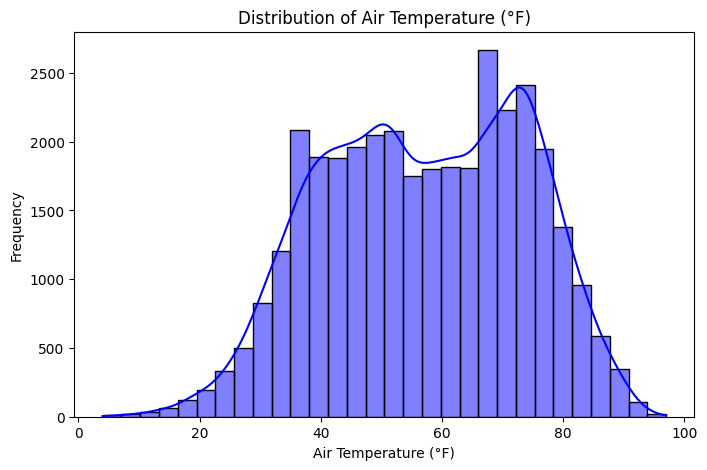

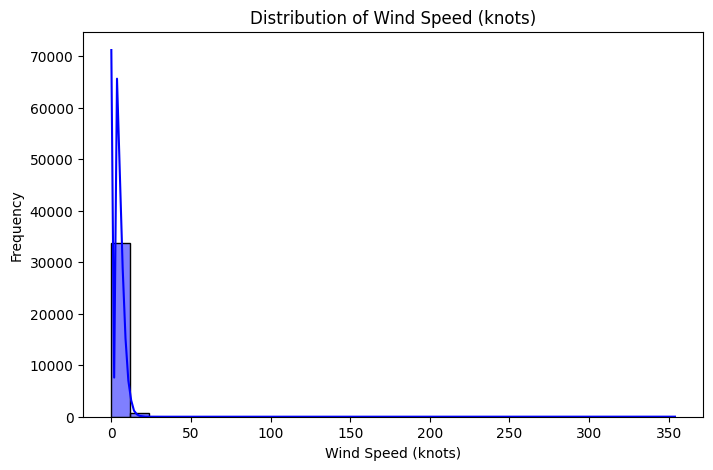

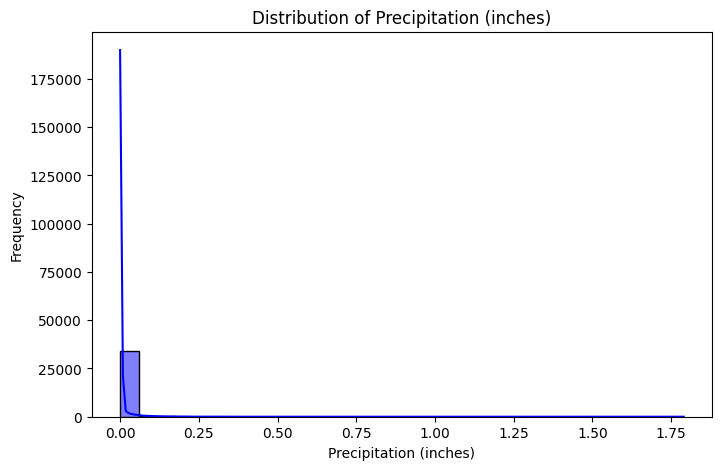

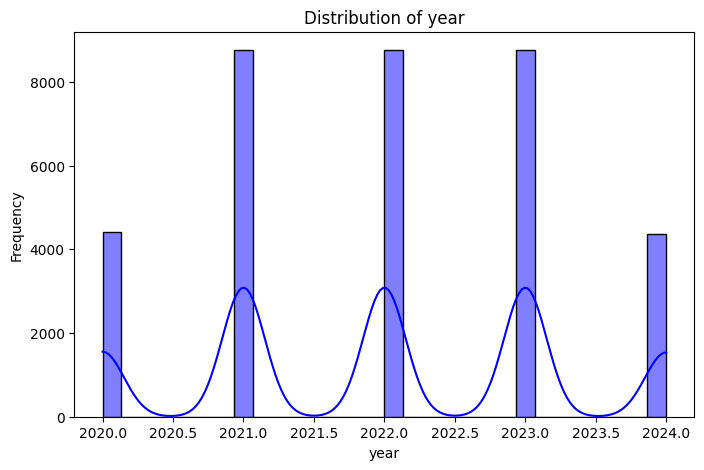

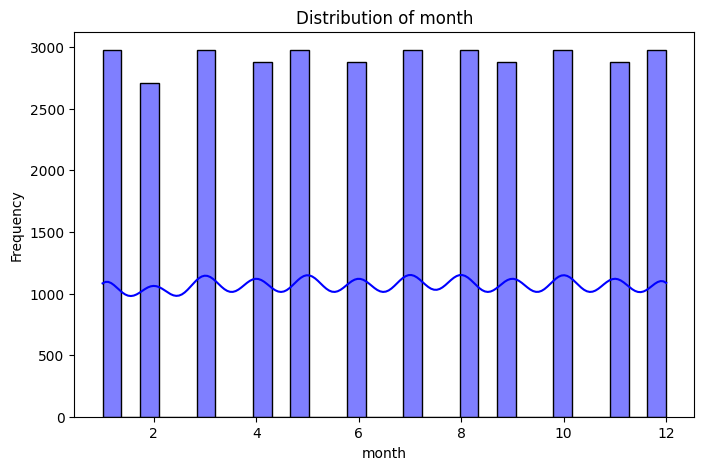

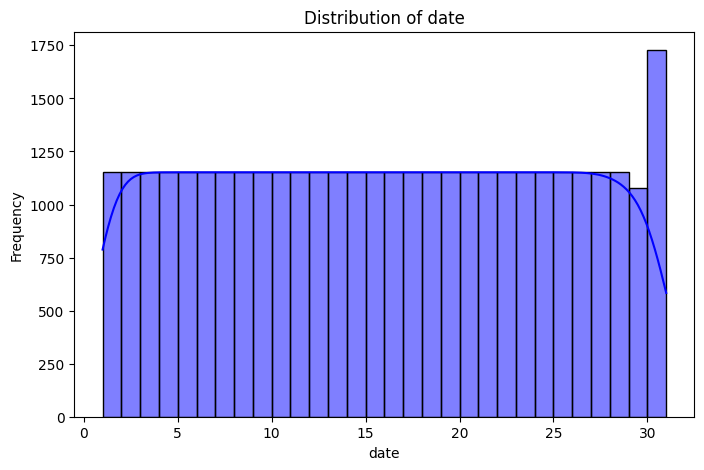

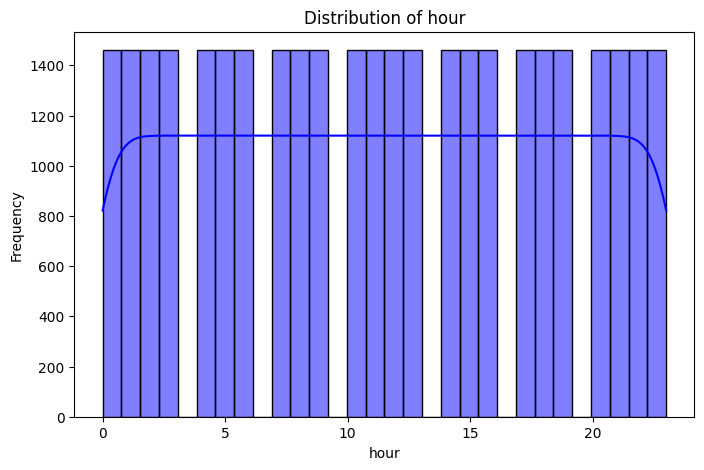

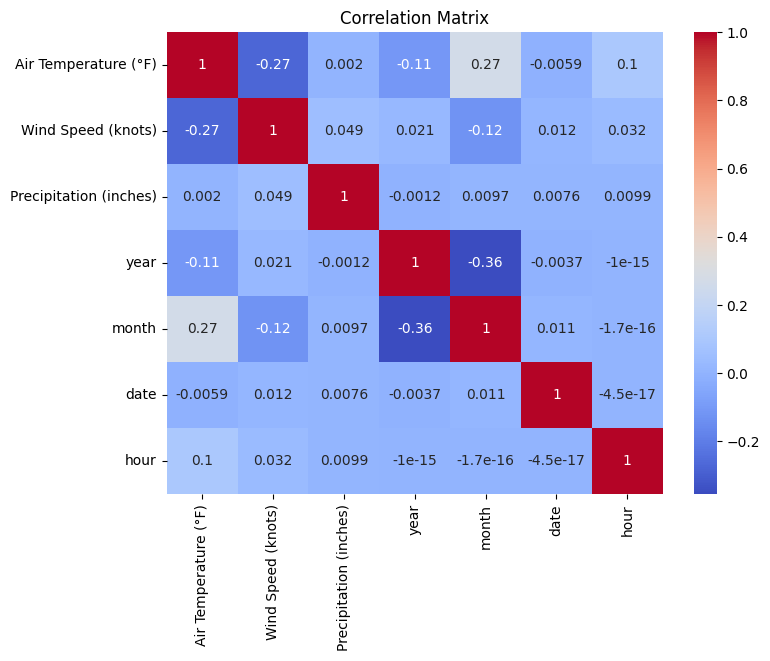

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

eda_summary = data_eda_renamed.describe()

# Missing Values
eda_missing_values = data_eda_renamed.isnull().sum()

# Plot Distributions
for column in data_eda_renamed.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_eda_renamed[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Correlation Analysis
eda_correlation = data_eda_renamed.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(eda_correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [24]:
eda_summary

,Air Temperature (°F),Wind Speed (knots),Precipitation (inches),year,month,date,hour
count,35062.000000,34562.000000,35062.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,57.065135,4.365129,0.004570,2021.997262,6.522930,15.729637,11.500000
std,16.615132,3.665128,0.032889,1.225458,3.448752,8.800218,6.922285
min,4.000000,0.000000,0.000000,2020.000000,1.000000,1.000000,0.000000
25%,44.000000,3.000000,0.000000,2021.000000,4.000000,8.000000,5.750000
50%,57.000000,4.000000,0.000000,2022.000000,7.000000,16.000000,11.500000
75%,71.000000,6.000000,0.000000,2023.000000,10.000000,23.000000,17.250000
max,97.000000,354.000000,1.790000,2024.000000,12.000000,31.000000,23.000000


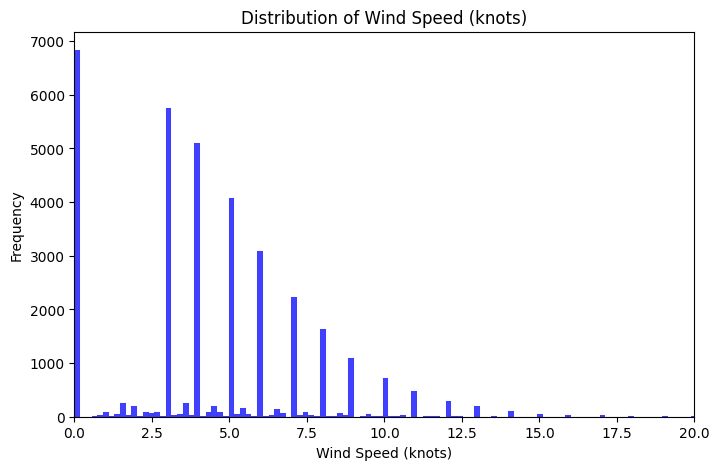

In [43]:
plt.figure(figsize=(8, 5))
sns.histplot(data_eda_renamed['Wind Speed (knots)'],color= 'blue')
plt.title('Distribution of Wind Speed (knots)')
plt.xlabel('Wind Speed (knots)')
plt.ylabel('Frequency')
plt.xlim(0, 20)  
plt.show()
